# Sentiment Analysis with Tweets


Twitter is known for being extremely volatile. From life updates to strong political opinions, Millions of tweets are posted everyday. Using online datasets of past tweets, I will use NLP to further understand the content on this social media platform.

## Data Dictionary:
1. id: The id associated with the tweets
2. label:
    * 0: positive sentiment
    * 1: negative sentiment
3. tweet: tweet of user id


## Sections of the Notebook:

1. Loading test and train files
2. Data Pre-Processing
    * Combine test and train files
    * Removing Twitter handles (@user)
    * Removing punctuation, numbers and special characters
    * Tokenization of words
    * Stemming of words
3. Data Visualization
    * WordCloud
    * Bar plots
4. Extracting Features (Word Embedding):
    * Bag-of-Words
    * TF-IDF
5. Data Modelling:
    * Logistic Regression
    * XGBoost
    * Decision Trees
6. Predicting Test Data Results
7. Conclusion and Thoughts

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string as str
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## 1. Loading test and train files

In [2]:
#load train file
train = pd.read_csv("train.csv")
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
# save a copy of train file
original_train = train.copy()

In [4]:
#load test file
test = pd.read_csv("test.csv")
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [5]:
#save a copy of the test file
original_test = test.copy()

The test and train dataset differs is in the label feature. Naturally, the testing dataset will not have a label feature as we are trying to figure that out by training on our train dataset.

## 2. Data Pre-Processing

There are issues with leaving the datasets as they currently are. There are many symbols that would harm data processing in ML models. I will get rid of them.


### Combine both datasets

In [6]:
combine = train.append(test, ignore_index=True, sort=True)

In [7]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [8]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


Columns that were not in the orginal train dataset are added to the end of the combined one and have NaN values.

### Removing Twitter Handles (@user)

We will create our own function to remove the Twitter Handles with 2 arguments. One is the tweet and the other is the pattern we want to remove.

In [9]:
def remove_pattern(tweet,pattern):
    
    #re.findall finds all ocurrences of the pattern in the tweet and puts it in a list
    r = re.findall(pattern,tweet)
    
    #re.sub() removes pattern from the sentences in the dataset
    for i in r:
        tweet = re.sub(i,"",tweet)
    
    return tweet

In [10]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### Removing Punctuation, Numbers, and Special Characters

In [11]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


### Removing Stop Words

In [12]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


### Tokenization

In [13]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

### Stemming

Stemming is the process of stripping suffixes from a word ("ing", "ly", etc).

In [14]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

The words are still tokenized. Let's put them back together.

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


## 3. Data Visualization 

We will experiment WordCloud. WorldCloud is a visualization where the most frequent words are large and the the less frequent ones are small.

In [16]:
# import WordCloud
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

### Visualizing Positive Tweets

In [17]:
#Store all positive words
positive_words = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

For our WordCloud, we will use the Twitter logo as our base.

In [18]:
# Get the Twitter logo image to print the words on
logo = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# Here we take the colour of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(logo)

# WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=logo).generate(positive_words)

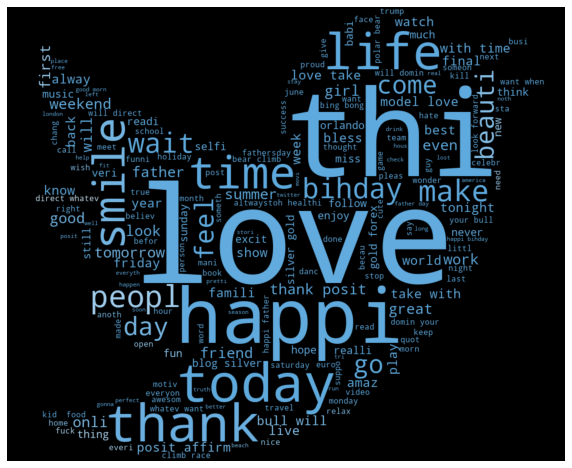

In [19]:
# Size of the image generated 
plt.figure(figsize=(10,20))

#recolor recolors the words to the colour of the image (blue)
#interpolation is used to smooth the image
plt.imshow(wc.recolor(color_func=image_colors), interpolation="hamming")

plt.axis('off')
plt.show()

From a quick glance, the big words are positive. It is safe to assume that our extraction of positive words worked.

### Visualizing Negative Tweets

In [20]:
#Store all negative words
negative_words = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

In [21]:
# WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=logo).generate(negative_words)

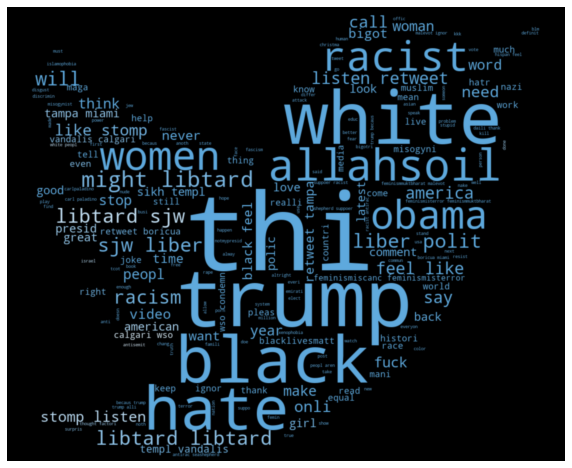

In [22]:
# Size of the image generated 
plt.figure(figsize=(10,20))

#recolor recolors the words to the colour of the image (blue)
#interpolation is used to smooth the image
plt.imshow(wc.recolor(color_func=image_colors), interpolation="gaussian")

plt.axis('off')
plt.show()

Many of these words are not necesarrily negative, but definitely are in a political context. We have different recurrent words in both labels, which gives us a good dataset to work with thanks to the differentiation in word recurrences.

### Impact of Hashtags on Tweets

Tweets contain many hashtags. These hashtags can be used to know of its impact and occurences in positive or negative tweets. 

In [23]:
# Function to extract hashtags
def Hashtag_Extraction(x):
    hashtags=[]
    
    #Loop over words in tweet
    for string in x:
        ht = re.findall(r'#(\w+)', string)
        hashtags.append(ht)
        
    return hashtags

#### Positive Hashtags

In [24]:
#Nested list of all positive hashtags
positive_hashtags = Hashtag_Extraction(combine['Tidy_Tweets'][combine['label']==0])

positive_hashtags

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [25]:
#Unnest the list
positive_hashtags_unnest = sum(positive_hashtags,[])

positive_hashtags_unnest

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

#### Negative Hashtags

In [26]:
#Nested list of negative hashtags
negative_hashtags = Hashtag_Extraction(combine['Tidy_Tweets'][combine['label']==1])

negative_hashtags

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [27]:
# Unnest negative list 
negative_hashtags_unnest = sum(negative_hashtags, [])

negative_hashtags_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

#### Frequency of Positive Hashtags

In [28]:
ht_freq_positive = nltk.FreqDist(positive_hashtags_unnest)

ht_freq_positive

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [29]:
#create positive dataframe
df_positive = pd.DataFrame({'Hashtags':list(ht_freq_positive.keys()), 'Count':list(ht_freq_positive.values())})

df_positive.head()

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


#### Frequency of Negative Hashtags

In [30]:
ht_freq_negative = nltk.FreqDist(negative_hashtags_unnest)

ht_freq_negative

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [31]:
#create negative dataframe
df_negative = pd.DataFrame({'Hashtags':list(ht_freq_negative.keys()), 'Count':list(ht_freq_negative.values())})

df_negative

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1714,jumpedtheshark,1
1715,freemilo,5
1716,milo,4
1717,mailboxprid,1


#### Plot Most Frequent Positive Hashtags

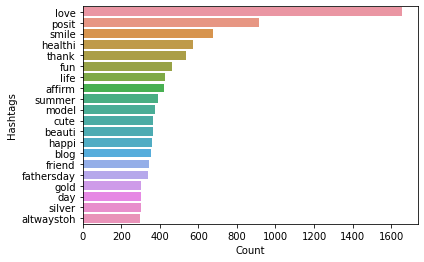

In [32]:
df_positive_plot = df_positive.nlargest(20, columns='Count')

sns.barplot(data=df_positive_plot, x='Count', y='Hashtags');

#### Plot Most Frequent Negative Hashtags

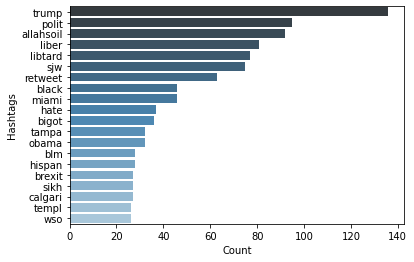

In [33]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

sns.barplot(data=df_negative_plot, x='Count', y='Hashtags', palette="Blues_d");

## 4. Extracting Features (Word Embedding)

#### Bag-of-Words Features

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

#initialize
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

#bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

#dataframe of bags-of-words
df_bow = pd.DataFrame(bow.todense()) # Review todense()

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF Features (Term Frequency-Inverse Document Frequency)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

#initialize
tfidf = TfidfVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')

#TFIDF feature matrix
tfidf_matrix = tfidf.fit_transform(combine['Tidy_Tweets'])

#dataframe of TFIDF
df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5. Data Modelling

### Splitting data into Training and Validation Set 

In [37]:
#Features from BOW for training set
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
#Features from TF-IDF for training set
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
from sklearn.model_selection import train_test_split

x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow, train['label'], test_size=0.3, random_state=42)

In [40]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=42)

In [41]:
from sklearn.metrics import f1_score

## We will use 3 different models and compare them to see which one performs best.

1. Logistic Regression
2. XGBoost
3. Decision Trees

## Logistic Regression

### Bag-of-Words

In [42]:
from sklearn.linear_model import LogisticRegression

#initialize the model
Log_Reg = LogisticRegression(random_state=42)

#fit the model
Log_Reg.fit(x_train_bow, y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#predicting probabilities
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.99254526e-01, 7.45474291e-04],
       [9.88851197e-01, 1.11488035e-02],
       [9.84780617e-01, 1.52193834e-02],
       ...,
       [9.40916501e-01, 5.90834991e-02],
       [3.28652633e-01, 6.71347367e-01],
       [9.79091545e-01, 2.09084547e-02]])

##### F1 score

In [44]:
# if prediction is greater than or equal to 0.3 than 1 (negative) else 0 (positive)
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.5303408146300915

### TF-IDF

In [45]:
#fit the model
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Predicting probabilities
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98043356, 0.01956644],
       [0.9813682 , 0.0186318 ],
       [0.88039805, 0.11960195],
       ...,
       [0.9419977 , 0.0580023 ],
       [0.60722425, 0.39277575],
       [0.96691991, 0.03308009]])

##### F1 score

In [47]:
# if prediction is greater than or equal to 0.3 than 1 (negative) else 0 (positive)
prediction_int = prediction_tfidf[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5451327433628319

 ## XGBoost

In [48]:
#import XGBoost
from xgboost import XGBClassifier

### Bag-of-Words

In [49]:
#initialize model
model_bow = XGBClassifier(random_state=42,learning_rate=0.5)

In [50]:
#fit the model
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
#predicting probabilities
xgb = model_bow.predict_proba(x_valid_bow)

xgb

array([[9.9954009e-01, 4.5990877e-04],
       [9.8376703e-01, 1.6232992e-02],
       [9.3909103e-01, 6.0908951e-02],
       ...,
       [9.7485995e-01, 2.5140043e-02],
       [1.5651548e-01, 8.4348452e-01],
       [9.6632278e-01, 3.3677202e-02]], dtype=float32)

#### F1 score

In [52]:
# if prediction is greater than or equal to 0.3 than 1 (negative) else 0 (positive)
xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow_score=f1_score(y_valid_bow,xgb_int)

xgb_bow_score

0.5318791946308725

### TF-IDF

In [53]:
#initialize the model
model_tfidf = XGBClassifier(random_state=42,learning_rate=0.5)

In [54]:
#fit the model
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
#predicting probabilities
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[9.9925160e-01, 7.4842048e-04],
       [9.8320556e-01, 1.6794432e-02],
       [9.4386697e-01, 5.6133043e-02],
       ...,
       [9.8322397e-01, 1.6776033e-02],
       [3.2376808e-01, 6.7623192e-01],
       [9.4946212e-01, 5.0537869e-02]], dtype=float32)

#### F1 score

In [56]:
# if prediction is greater than or equal to 0.3 than 1 (negative) else 0 (positive)
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
xgb_tfidf_score=f1_score(y_valid_tfidf,xgb_int_tfidf)

xgb_tfidf_score

0.5494137353433836

## Decision Trees

In [57]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#initialize the model
dct = DecisionTreeClassifier(criterion='entropy', random_state=42)

### Bag-of-Words

In [58]:
# fit the model
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [59]:
#predicting probabilities
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ]])

In [60]:
# if prediction is greater than or equal to 0.3 than 1 (negative) else 0 (positive)
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.4925558312655086

### TF-IDF

In [61]:
#fit the model
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [62]:
#predicting probabilities
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [63]:
# if prediction is greater than or equal to 0.3 than 1 (negative) else 0 (positive)
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.5159183673469389

## Model Comparison

#### Bag-of-Words

In [66]:
algo_bow = ['LogisticRegression(Bag-of-Words)', 'XGBoost(Bag-of-Words)', 'DecisionTree(Bag-of-Words)']

score_bow = [log_bow, xgb_bow_score, dct_score_bow]

compare_bow = pd.DataFrame({'Model':algo_bow, 'F1_Score':score_bow}, index=[i for i in range(1,4)])

compare_bow.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.530341,0.531879,0.492556


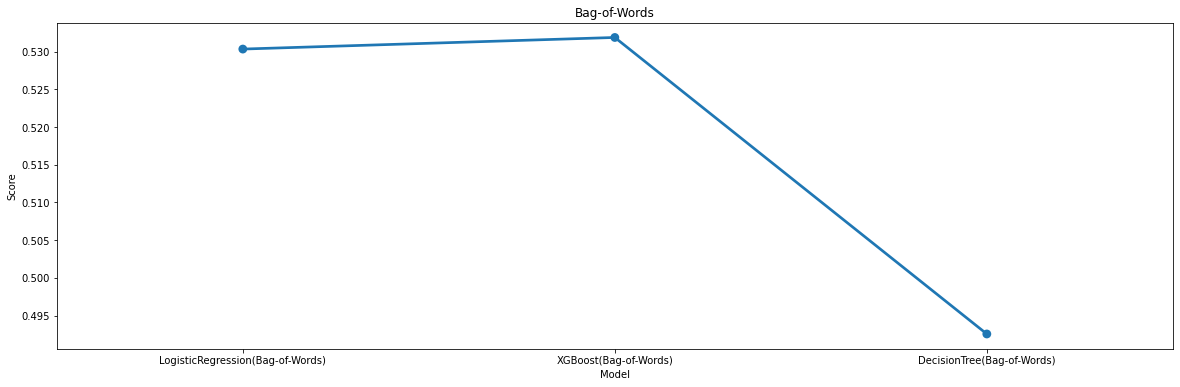

In [67]:
plt.figure(figsize=(20,6))

sns.pointplot(x='Model',y='F1_Score',data=compare_bow)

plt.title('Bag-of-Words')
plt.xlabel('Model')
plt.ylabel('Score')

plt.show()

#### TF-IDF

In [65]:
algo_tfidf = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

score_tfidf = [log_tfidf,xgb_tfidf_score, dct_score_tfidf]

compare_tfidf = pd.DataFrame({'Model':algo_tfidf, "F1_Score":score_tfidf}, index=[i for i in range(1,4)])

compare_tfidf.T

,1,2,3
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.545133,0.549414,0.515918


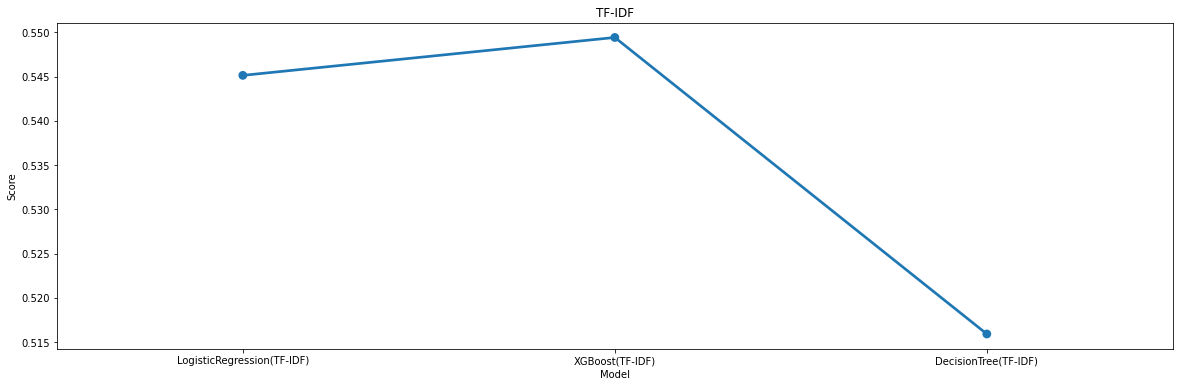

In [68]:
plt.figure(figsize=(20,6))

sns.pointplot(x='Model',y='F1_Score',data=compare_tfidf)

plt.title('TF-IDF')
plt.xlabel('Model')
plt.ylabel('Score')

plt.show()

The best model for both Bag-of-Words and TF-IDF is XGBoost. Let's now compare them both.

In [70]:
algo_best = ['XGBoost(Bag-of-Words)','XGBoost(TF-IDF)']

score_best = [xgb_bow_score, xgb_tfidf_score]

compare_best = pd.DataFrame({'Model':algo_best, 'F1_Score': score_best}, index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,XGBoost(Bag-of-Words),XGBoost(TF-IDF)
F1_Score,0.531879,0.549414


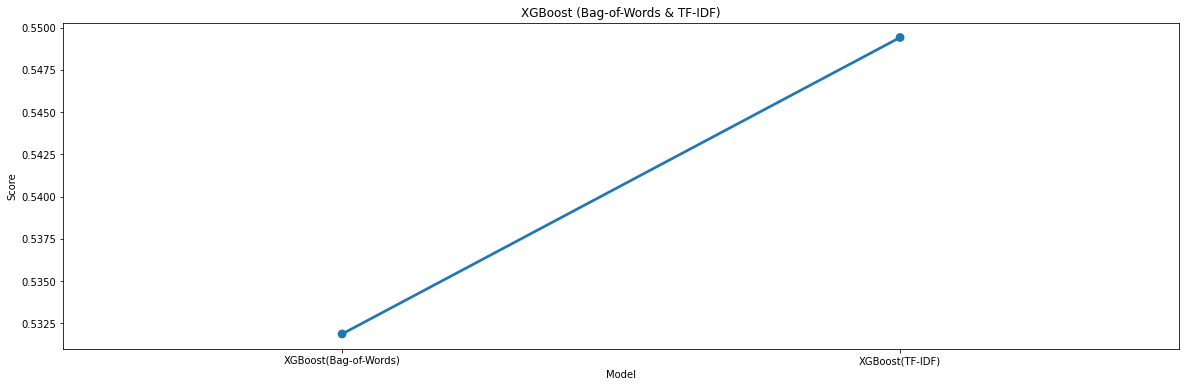

In [72]:
plt.figure(figsize=(20,6))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('XGBoost (Bag-of-Words & TF-IDF)')
plt.xlabel('Model')
plt.ylabel('Score')

plt.show()

The best F1 score is obtained with XGBoost using TF-IDF features.

## 6. Predicting Test Data Results

In [77]:
test_tfidf = tfidf_matrix[31962:]
test_pred = model_tfidf.predict_proba(test_tfidf)

# if prediction is greater than or equal to 0.3 than 1 (negative) else 0 (positive)
test_pred_int = test_pred[:,1] >= 0.3

# converting the results to integer type
test_pred_int = test_pred_int.astype(np.int)

# storing results in new label feature
test['label'] = test_pred_int

# save results in new csv file
submission = test[['id','label']]
submission.to_csv('result.csv', index=False)

#print result
result = pd.read_csv('result.csv')
result

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


### Result proportions

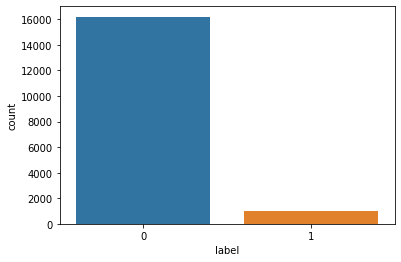

In [78]:
sns.countplot(result['label']);

Let's compare with training data.

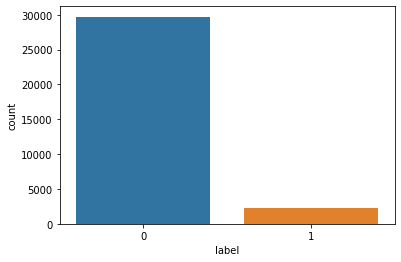

In [80]:
sns.countplot(original_train['label']);

## 7. Conclusion and Thoughts

### Danger of low ratio of negative tweets 

As we can see above, both graphs have similar proportions of positive and negative tweets. There is a really low ratio of negative tweets which might make it harder to find true negative tweets. 

The algorithm might be heavily biased from such a low ratio of negative tweets. From the top 20 most recurrent negative words, they are heavily political. Is it simply the fact that toxic tweets are mostly political, or that the algorithm is heavily biased in only being able to identify political bias?

### Hyperparameter tuning

To improve the algorithm, we can tune the hyperparameters to improve our predicting results.